In [0]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt


In [0]:
df=pd.read_csv("/content/Train.csv")

In [88]:
print(df.shape)
print(df.info())
print(df.describe())
df.head()

(23856, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23856 entries, 0 to 23855
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   INCIDENT_ID       23856 non-null  object 
 1   DATE              23856 non-null  object 
 2   X_1               23856 non-null  int64  
 3   X_2               23856 non-null  int64  
 4   X_3               23856 non-null  int64  
 5   X_4               23856 non-null  int64  
 6   X_5               23856 non-null  int64  
 7   X_6               23856 non-null  int64  
 8   X_7               23856 non-null  int64  
 9   X_8               23856 non-null  int64  
 10  X_9               23856 non-null  int64  
 11  X_10              23856 non-null  int64  
 12  X_11              23856 non-null  int64  
 13  X_12              23674 non-null  float64
 14  X_13              23856 non-null  int64  
 15  X_14              23856 non-null  int64  
 16  X_15              23856 non-

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
0,CR_102659,04-JUL-04,0,36,34,2,1,5,6,1,6,1,174,1.0,92,29,36,0
1,CR_189752,18-JUL-17,1,37,37,0,0,11,17,1,6,1,236,1.0,103,142,34,1
2,CR_184637,15-MAR-17,0,3,2,3,5,1,0,2,3,1,174,1.0,110,93,34,1
3,CR_139071,13-FEB-09,0,33,32,2,1,7,1,1,6,1,249,1.0,72,29,34,1
4,CR_109335,13-APR-05,0,33,32,2,1,8,3,0,5,1,174,0.0,112,29,43,1


In [89]:
#  check NaN values in dataframe 
df.iloc[:,2:].isnull().values.any()

True

In [0]:
# Fill that values with mean
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
df.iloc[:,2:]=imp.fit_transform(df.iloc[:,2:])

In [99]:
# again check for NaN values
df.iloc[:,2:].isnull().values.any()

False

In [100]:
correlation=df.corr()
correlation['MULTIPLE_OFFENSE'].sort_values(ascending=False)  # we need only for Target variable

MULTIPLE_OFFENSE    1.000000
X_11                0.105088
X_15                0.044916
X_1                 0.014034
X_13                0.006512
X_9                -0.000748
X_4                -0.002921
X_5                -0.003450
X_6                -0.007903
X_7                -0.008036
X_14               -0.015267
X_3                -0.027218
X_2                -0.027293
X_8                -0.033397
X_12               -0.113041
X_10               -0.242596
Name: MULTIPLE_OFFENSE, dtype: float64

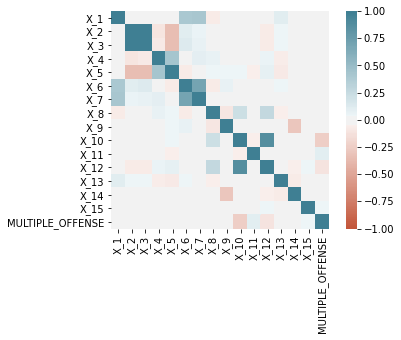

In [101]:
sn.heatmap(correlation,vmin=-1,vmax=1,cmap=sn.diverging_palette(20, 220, n=200),square=True)   # graphical representation of corrilation

## check the linearity with X_10

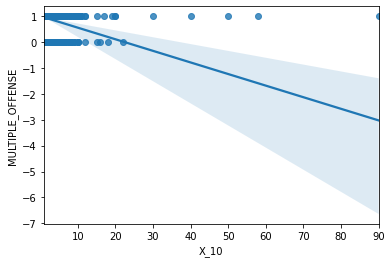

In [102]:
sn.regplot(x="X_10",y="MULTIPLE_OFFENSE",data=df)


# y is either 1 or 0  
# hence it shows classification line

## Let's scale the **data**

In [104]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
df.iloc[:,2:17]=scale.fit_transform(df.iloc[:,2:17])
print(df.describe())

                X_1           X_2  ...          X_15  MULTIPLE_OFFENSE
count  2.385600e+04  2.385600e+04  ...  2.385600e+04      23856.000000
mean  -9.084320e-18  3.283293e-17  ... -7.753149e-16          0.955231
std    1.000021e+00  1.000021e+00  ...  1.000021e+00          0.206800
min   -3.360249e-01 -1.626729e+00  ... -3.990236e+00          0.000000
25%   -3.360249e-01 -1.167409e+00  ...  6.382199e-02          1.000000
50%   -3.360249e-01 -5.191668e-02  ...  6.382199e-02          1.000000
75%   -3.360249e-01  7.354895e-01  ...  6.382199e-02          1.000000
max    4.526073e+00  1.785364e+00  ...  1.971614e+00          1.000000

[8 rows x 16 columns]


In [0]:
from sklearn.model_selection import train_test_split
train_data,test_data=train_test_split(df.iloc[:,2:],test_size=0.2)


In [106]:
print(train_data['MULTIPLE_OFFENSE'].value_counts())
print(test_data['MULTIPLE_OFFENSE'].value_counts())

1.0    18241
0.0      843
Name: MULTIPLE_OFFENSE, dtype: int64
1.0    4547
0.0     225
Name: MULTIPLE_OFFENSE, dtype: int64


In [120]:
from sklearn.ensemble import RandomForestClassifier
# from sklearn.linear_model import LogisticRegression
model=RandomForestClassifier()   # Let use all default values
# model=LogisticRegression()  
model.fit(train_data.iloc[:,:15],train_data.iloc[:,15])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

## Calculate the Error

In [121]:
predicted_value=model.predict(test_data.iloc[:,:15])
from sklearn.metrics import mean_squared_error
MSE=mean_squared_error(predicted_value,test_data.iloc[:,15])
print(MSE)

0.009220452640402346


In [122]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(model,test_data.iloc[:,:15],test_data.iloc[:,15],cv=10)
print("Accuracy of model =",score.mean()*100,"%")

Accuracy of model = 98.30272010385693 %


## Let's made predicts 

In [0]:
test_df=pd.read_csv("/content/Test.csv")

In [125]:
print(test_df.shape)
print(test_df.info())
print(test_df.describe())
print(test_df.head())

(15903, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15903 entries, 0 to 15902
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   INCIDENT_ID  15903 non-null  object 
 1   DATE         15903 non-null  object 
 2   X_1          15903 non-null  int64  
 3   X_2          15903 non-null  int64  
 4   X_3          15903 non-null  int64  
 5   X_4          15903 non-null  int64  
 6   X_5          15903 non-null  int64  
 7   X_6          15903 non-null  int64  
 8   X_7          15903 non-null  int64  
 9   X_8          15903 non-null  int64  
 10  X_9          15903 non-null  int64  
 11  X_10         15903 non-null  int64  
 12  X_11         15903 non-null  int64  
 13  X_12         15776 non-null  float64
 14  X_13         15903 non-null  int64  
 15  X_14         15903 non-null  int64  
 16  X_15         15903 non-null  int64  
dtypes: float64(1), int64(14), object(2)
memory usage: 2.1+ MB
None
             

check for NaN values

In [126]:
test_df.iloc[:,2:].isnull().values.any()

True

In [0]:
#  Fill NaN values
from sklearn.impute import SimpleImputer
test_imp = SimpleImputer(missing_values=np.nan, strategy='mean')
test_df.iloc[:,2:]=test_imp.fit_transform(test_df.iloc[:,2:])

In [128]:
#  again check for Nan value
test_df.iloc[:,2:].isnull().values.any()

False

In [130]:
# Scale the data
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
test_df.iloc[:,2:]=scale.fit_transform(test_df.iloc[:,2:])
print(test_df.describe())

                X_1           X_2  ...          X_14          X_15
count  1.590300e+04  1.590300e+04  ...  1.590300e+04  1.590300e+04
mean  -3.335626e-17  1.377255e-16  ... -3.054073e-16  1.103151e-15
std    1.000031e+00  1.000031e+00  ...  1.000031e+00  1.000031e+00
min   -3.314910e-01 -1.623460e+00  ... -1.662610e+00 -4.020031e+00
25%   -3.314910e-01 -1.163791e+00  ... -9.949746e-01  6.944597e-02
50%   -3.314910e-01 -4.745297e-02  ... -2.352512e-01  6.944597e-02
75%   -3.314910e-01  7.405504e-01  ...  8.007352e-01  6.944597e-02
max    4.625778e+00  1.791221e+00  ...  1.606502e+00  1.993906e+00

[8 rows x 15 columns]


## Now go for prediction

In [131]:
predict_data=model.predict(test_df.iloc[:,2:])
print(len(predict_data))

15903


# Now a make a CSV file and store predicted value with INCIDENT_ID

In [133]:
new_df=pd.DataFrame(test_df["INCIDENT_ID"])
new_df["MULTIPLE_OFFENSE"]=predict_data
new_df.head()

,INCIDENT_ID,MULTIPLE_OFFENSE
0,CR_195453,1.0
1,CR_103520,1.0
2,CR_196089,1.0
3,CR_112195,1.0
4,CR_149832,1.0


In [0]:
#  save into file 
new_df.to_csv("Predicted_file.csv",index=False)